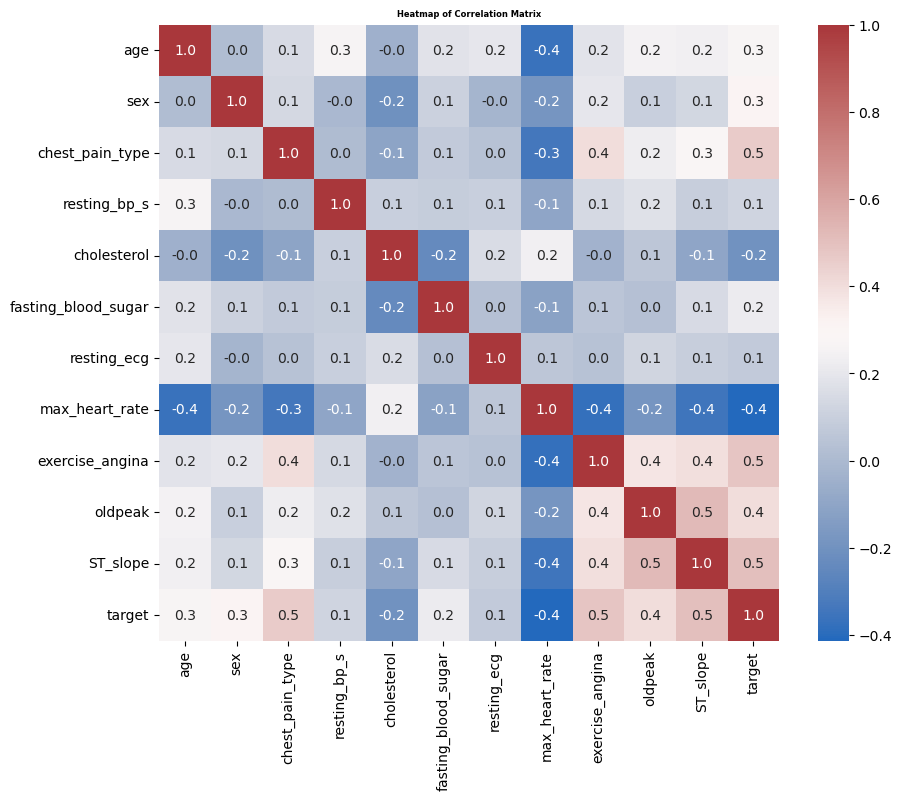

Optimization terminated successfully.
         Current function value: 0.361263
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  952
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           15
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.4780
Time:                        23:33:11   Log-Likelihood:                -343.92
converged:                       True   LL-Null:                       -658.86
Covariance Type:            nonrobust   LLR p-value:                1.586e-124
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2435      0.114      2.130      0.033       0.019       0.468
x2             0.0587      0.

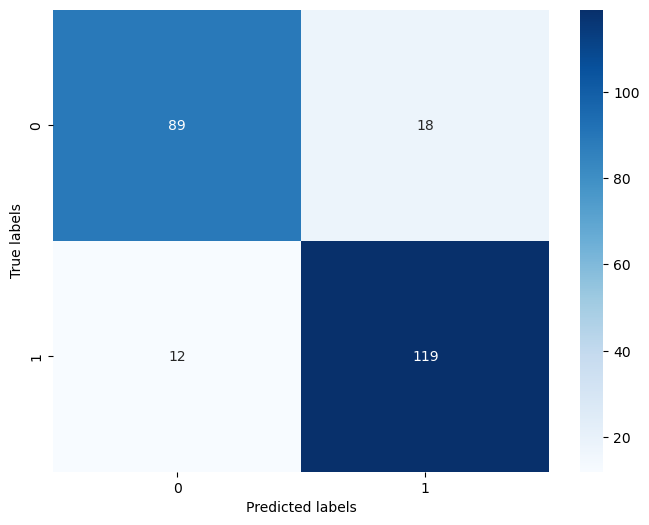

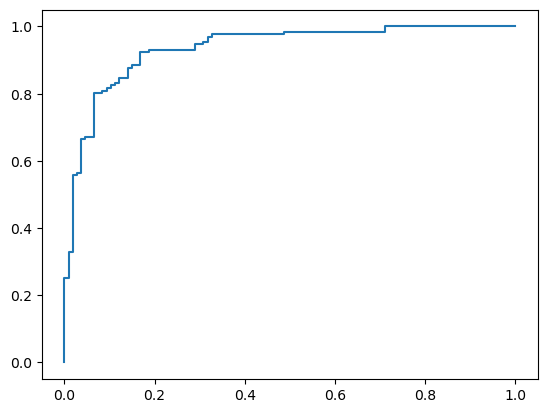

Model: LogistocRegression
Recall: 0.8697478991596639
Accuracy: 0.8697478991596639
Precision: 0.8698508815290823
--------------------------------------------------
Model: LinearDiscriminantAnalysis
Recall: 0.8739495798319328
Accuracy: 0.8739495798319328
Precision: 0.8742665961376239
--------------------------------------------------
Model: DecisionTreeClassifier
Recall: 0.8907563025210085
Accuracy: 0.8907563025210085
Precision: 0.8944424559397821
--------------------------------------------------
Model: RandomForestClassifier
Recall: 0.9453781512605042
Accuracy: 0.9453781512605042
Precision: 0.9453631366783419
--------------------------------------------------
Model: SVC
Recall: 0.8865546218487395
Accuracy: 0.8865546218487395
Precision: 0.8900734052486242
--------------------------------------------------


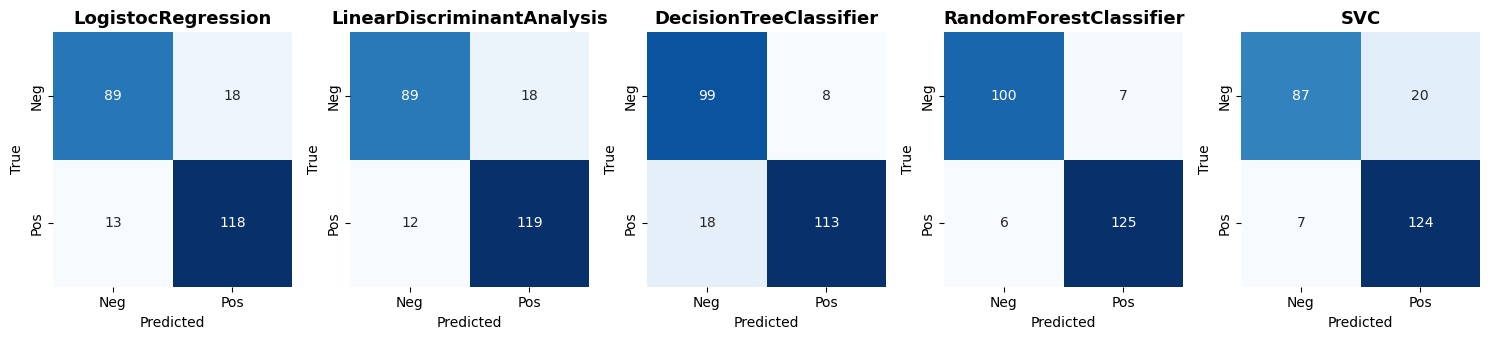

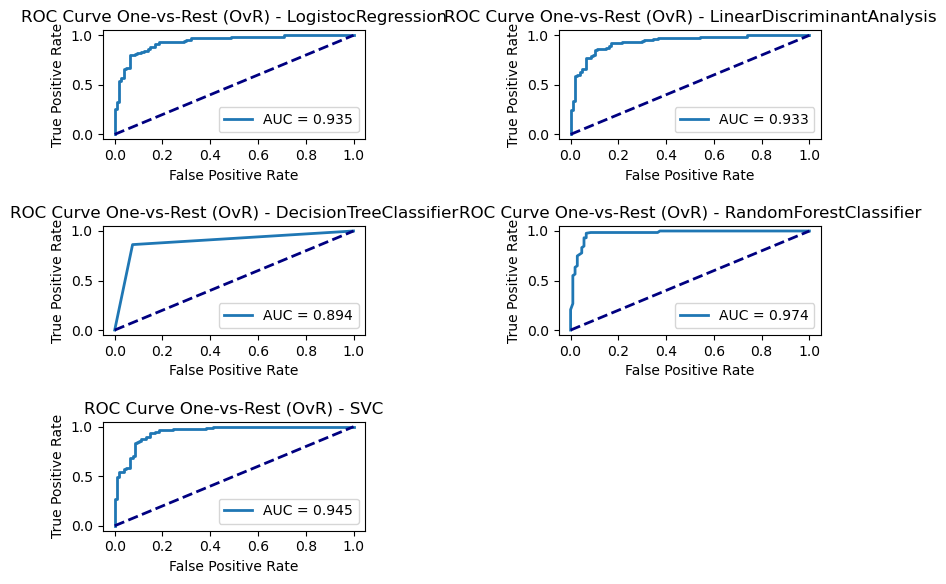

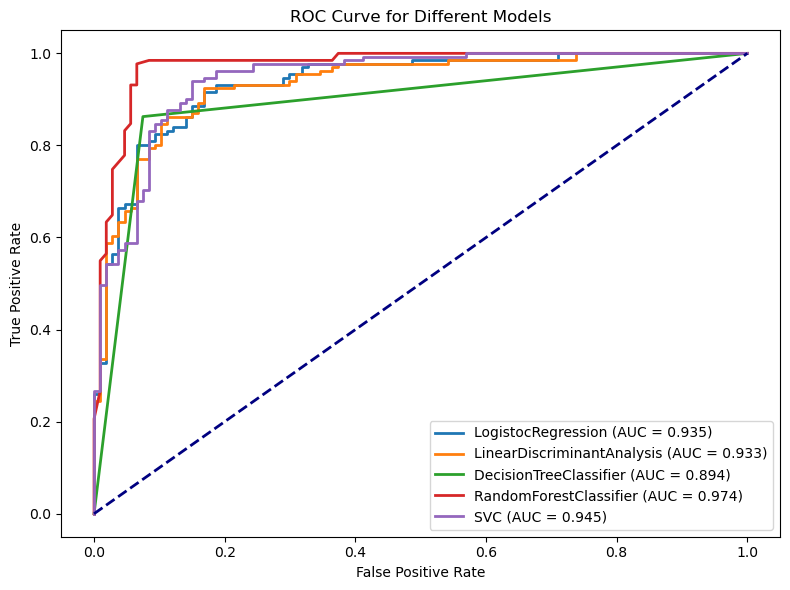

0.8529411764705882
age: 0.2565
sex: 0.4775
cholesterol: -0.2284
max_heart_rate: -0.4060
oldpeak: 0.6720
chest_pain_type_1: -0.1779
chest_pain_type_2: 0.0446
chest_pain_type_3: 0.7783
fasting_blood_sugar_1: 0.3847
exercise_angina_1: 0.5239
Optimization terminated successfully.
         Current function value: 0.408875
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  952
Model:                          Logit   Df Residuals:                      942
Method:                           MLE   Df Model:                            9
Date:                Sat, 01 Jun 2024   Pseudo R-squ.:                  0.4092
Time:                        23:33:16   Log-Likelihood:                -389.25
converged:                       True   LL-Null:                       -658.86
Covariance Type:            nonrobust   LLR p-value:                2.278e-110
                 coef    st

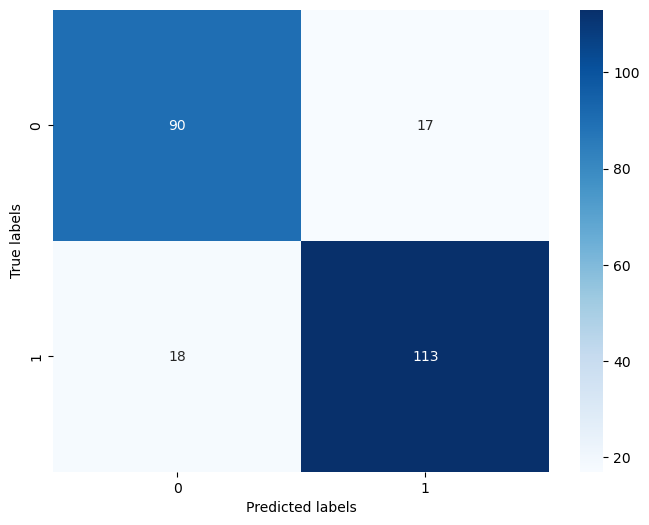

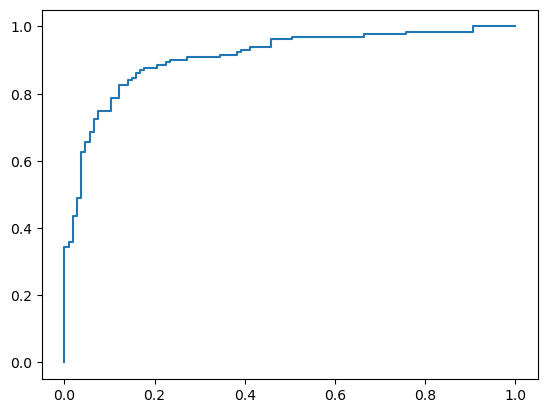

Model: LogistocRegression
Recall: 0.8529411764705882
Accuracy: 0.8529411764705882
Precision: 0.8530920060331825
--------------------------------------------------
Model: LinearDiscriminantAnalysis
Recall: 0.8571428571428571
Accuracy: 0.8571428571428571
Precision: 0.8580346375621966
--------------------------------------------------
Model: DecisionTreeClassifier
Recall: 0.8739495798319328
Accuracy: 0.8739495798319328
Precision: 0.8776594765899579
--------------------------------------------------
Model: RandomForestClassifier
Recall: 0.9117647058823529
Accuracy: 0.9117647058823529
Precision: 0.9122535093582887
--------------------------------------------------
Model: SVC
Recall: 0.8319327731092437
Accuracy: 0.8319327731092437
Precision: 0.8319327731092437
--------------------------------------------------


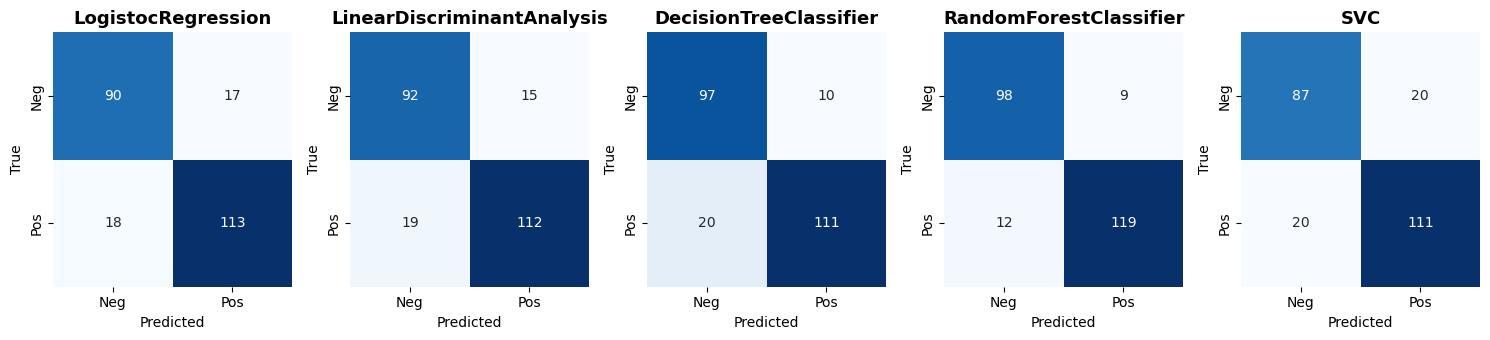

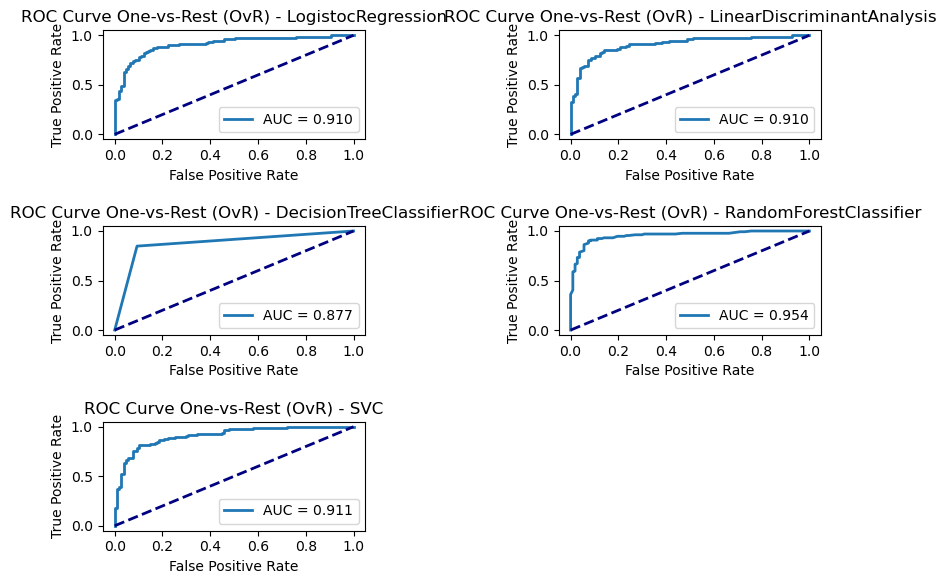

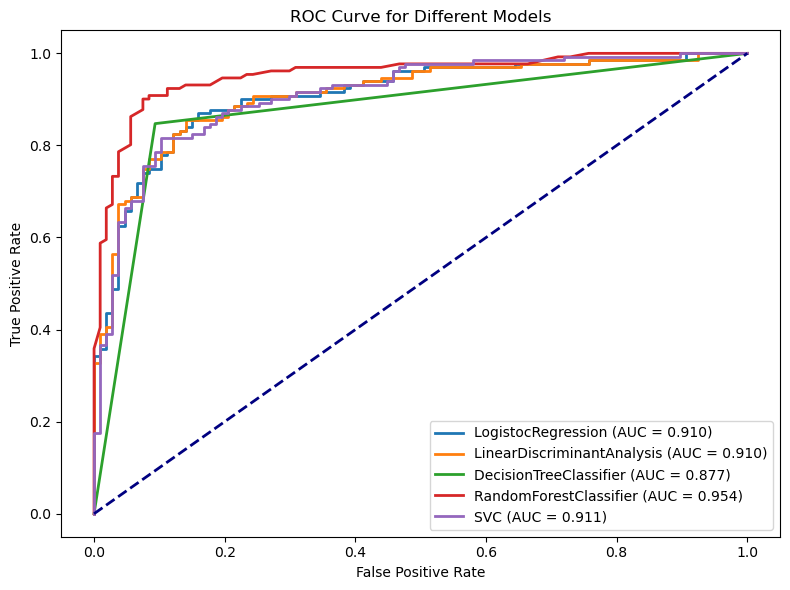

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# mady by bowen xu

# 固定随机种子
np.random.seed(42)

# 1. 数据预处理
# 加载数据
data_path = 'heart_statlog_cleveland_hungary_final.csv'
data = pd.read_csv(data_path)

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf

# 初始化标签编码器
le = LabelEncoder()

# 展示相关性热力图
import seaborn as sns
df_dummies = pd.get_dummies(data, drop_first=True) 
correlation_matrix = df_dummies.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".1f")
plt.title('Heatmap of Correlation Matrix', weight='bold', size=6)
plt.show()     

# 对分类变量进行标签编码
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope']
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# 划分数据集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 提取标签
y_train = train_data['target'].values
y_test = test_data['target'].values

# 移除不必要的列
train_data = train_data.drop(columns=['target'])
test_data = test_data.drop(columns=['target'])

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

logit_model_sm = sm.Logit(y_train, X_train_scaled)
result_sm = logit_model_sm.fit()
print(result_sm.summary())

# 2. 逻辑回归
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty=None)
model_1.fit(X_train_scaled, y_train)
print(model_1.score(X_test_scaled, y_test))

# 3. 模型评价
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# 精度、召回、F1分数
p1 = model_1.predict(X_test_scaled)
#print(classification_report(y_test, p1))

# 解释每个自变量在logistic回归模型中对因变量的影响，即相关系数
# 获取独热编码后的特征名称
feature_names = list(train_data.columns)
print(feature_names)

# 将系数与特征名称结合起来
coefficients = model_1.coef_[0]  # 如果是二分类模型，model_1.coef_ 是一个二维数组，取第一个数组
coef_dict = dict(zip(feature_names, coefficients))

# 打印每个特征的系数
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")

# # 拟合逻辑回归模型
# logit_model = smf.logit(formula='target ~ age + resting_bp_s + cholesterol + max_heart_rate + oldpeak+ sex_1 + chest_pain_type_1 + chest_pain_type_2 + chest_pain_type_3 + fasting_blood_sugar_1 + resting_ecg_1 + resting_ecg_2 + exercise_angina_1 + ST_slope_1 + ST_slope_2 + ST_slope_3', data=data)
# results = logit_model.fit()
# # Wald检验
# print(results.summary())

# 混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import seaborn as sns

cm = confusion_matrix(y_test, p1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 绘制ROC曲线
prob1 = model_1.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, prob1[:,1])
plt.plot(fpr, tpr)
plt.show()

# 4. 多种分类器对比
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import recall_score, accuracy_score, precision_score

models = {
    "LogistocRegression": LogisticRegression(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC(probability=True)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    recall = recall_score(y_test, predictions, average='weighted')  
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)

# 混淆矩阵
class_labels = ['Neg', 'Pos']

fig, axes = plt.subplots(1, len(models), figsize=(15, 3.5))

for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, 
                xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f"{model_name}", weight='bold', size=13)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# ROC 曲线
from sklearn.metrics import roc_curve, auc

fig, axs = plt.subplots(3, 2, figsize=(8, 6))

for idx, (model_name, model) in enumerate(models.items()):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    row = idx // 2
    col = idx % 2
    axs[row, col].plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
    axs[row, col].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'ROC Curve One-vs-Rest (OvR) - {model_name}')
    axs[row, col].legend(loc='best')

# 隐藏第6个子图
axs[2, 1].axis('off')

# 将第5个子图居中
axs[2, 0].set_position([0.3, 0.1, 0.4, 0.25])

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# 在一个图中对比
plt.figure(figsize=(8, 6))
# 遍历模型
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

# 绘制基准线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 添加图例和标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='best')

# 保存图形到文件
plt.tight_layout()
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 模型选择与变量选择变量选择

# 固定随机种子
np.random.seed(42)

# 1. 数据预处理
# 加载数据
data_path = 'heart_statlog_cleveland_hungary_final.csv'
data = pd.read_csv(data_path)
# 删除列
data = data.drop(columns=['resting_ecg'])
data = data.drop(columns=['ST_slope'])
data = data.drop(columns=['resting_bp_s'])


from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 初始化标签编码器
le = LabelEncoder()

# 对分类变量进行标签编码
categorical_features = ['chest_pain_type', 'fasting_blood_sugar', 'exercise_angina']
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# 划分数据集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 提取标签
y_train = train_data['target'].values
y_test = test_data['target'].values

# 移除不必要的列
train_data = train_data.drop(columns=['target'])
test_data = test_data.drop(columns=['target'])

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

# 重新计算模型
# 5.1. 逻辑回归
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty=None)
model_1.fit(X_train_scaled, y_train)
print(model_1.score(X_test_scaled, y_test))

# 5.2. 模型评价
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# 精度、召回、F1分数
p1 = model_1.predict(X_test_scaled)
#print(classification_report(y_test, p1))

# 解释每个自变量在logistic回归模型中对因变量的影响，即相关系数
# 假设特征名称存储在 feature_names 列表中
feature_names = list(train_data.columns)

# 将系数与特征名称结合起来
coefficients = model_1.coef_[0]  # 如果是二分类模型，model_1.coef_ 是一个二维数组，取第一个数组
coef_dict = dict(zip(feature_names, coefficients))

# 打印每个特征的系数
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")


logit_model_sm = sm.Logit(y_train, X_train_scaled)
result_sm = logit_model_sm.fit()
print(result_sm.summary())
# 混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import seaborn as sns

cm = confusion_matrix(y_test, p1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 绘制ROC曲线
prob1 = model_1.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, prob1[:,1])
plt.plot(fpr, tpr)
plt.show()

# 5.3. 多种分类器对比
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import recall_score, accuracy_score, precision_score

models = {
    "LogistocRegression": LogisticRegression(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC(probability=True)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    recall = recall_score(y_test, predictions, average='weighted')  
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)

# 混淆矩阵
class_labels = ['Neg', 'Pos']

fig, axes = plt.subplots(1, len(models), figsize=(15, 3.5))

for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, 
                xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f"{model_name}", weight='bold', size=13)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.savefig('confusion_matrix_new.png', dpi=300, bbox_inches='tight')
plt.show()


# ROC 曲线
from sklearn.metrics import roc_curve, auc

fig, axs = plt.subplots(3, 2, figsize=(8, 6))

for idx, (model_name, model) in enumerate(models.items()):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    row = idx // 2
    col = idx % 2
    axs[row, col].plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
    axs[row, col].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'ROC Curve One-vs-Rest (OvR) - {model_name}')
    axs[row, col].legend(loc='best')

# 隐藏第6个子图
axs[2, 1].axis('off')

# 将第5个子图居中
axs[2, 0].set_position([0.3, 0.1, 0.4, 0.25])

plt.tight_layout()
plt.savefig('roc_curves_new.png', dpi=300, bbox_inches='tight')
plt.show()

# 在一个图中对比
plt.figure(figsize=(8, 6))
# 遍历模型
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

# 绘制基准线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 添加图例和标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='best')

# 保存图形到文件
plt.tight_layout()
plt.savefig('roc_curves_comparison_new.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
data_path = 'heart_statlog_cleveland_hungary_final.csv'
data = pd.read_csv(data_path)
data

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
